# Executive summary 

Bellabeat, a high-tech manufacturer of health-focused products for women. Bellabeat is a successful small company, but they have the potential to become a larger player in the global
smart device market. Urška Sršen, cofounder and Chief Creative Officer of Bellabeat, believes that analyzing smart device fitness data could help unlock new growth opportunities for the company. You have been asked to focus on one of Bellabeat’s products and analyze smart device data to gain insight into how consumers are using their smart devices. The insights you discover will then help guide marketing strategy for the company. You will present your analysis to the Bellabeat executive team along with your high-level recommendations for Bellabeat’s marketing strategy

## Dataset 

FitBit Fitness Tracker Data (CC0: Public Domain, dataset made available through Mobius): This Kaggle data set contains personal fitness tracker from thirty fitbit users. Thirty eligible Fitbit users consented to the submission of personal tracker data, including minute-level output for physical activity, heart rate, and sleep monitoring. It includes information about daily activity, steps, and heart rate that can be used to explore users’ habits.

## Objective

To analyze smart device usage data in order to gain insight into how people are already using their smart devices. Then, using this information, to provide high-level recommendations for how these trends can inform Bellabeat marketing strategy.

In [1]:
# get directory of the files

import os 
dir_path = os.path.dirname(os.path.realpath('dailyActivity_merged.csv'))
cwd = os.getcwd()
cwd

'C:\\Users\\tony3\\Projects\\Case Study Bellabeat'

In [2]:
# import exploratory files 

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns


In [3]:
# read csv files 

df = pd.read_csv('C:/Users/tony3/Projects/Case Study Bellabeat/dailyActivity_merged.csv')


## Explore the dataset 



In [32]:
# explore the dataset 

df.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,DayOfWeek,TotalMinutes
0,1503960366,2016-04-12,13162,8.50,8.50,1.88,0.55,6.06,0.0,25,13,328,728,1985,Tuesday,1094
1,1927972279,2016-04-12,678,0.47,0.47,0.00,0.00,0.47,0.0,0,0,55,734,2220,Tuesday,789
2,8877689391,2016-04-12,23186,20.40,20.40,12.22,0.34,7.82,0.0,85,7,312,1036,3921,Tuesday,1440
3,2022484408,2016-04-12,11875,8.34,8.34,3.31,0.77,4.26,0.0,42,14,227,1157,2390,Tuesday,1440
4,2026352035,2016-04-12,4414,2.74,2.74,0.19,0.35,2.20,0.0,3,8,181,706,1459,Tuesday,898


In [49]:
# information about the data types

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        940 non-null    int64  
 1   ActivityDate              940 non-null    object 
 2   TotalSteps                940 non-null    int64  
 3   TotalDistance             940 non-null    float64
 4   TrackerDistance           940 non-null    float64
 5   LoggedActivitiesDistance  940 non-null    float64
 6   VeryActiveDistance        940 non-null    float64
 7   ModeratelyActiveDistance  940 non-null    float64
 8   LightActiveDistance       940 non-null    float64
 9   SedentaryActiveDistance   940 non-null    float64
 10  VeryActiveMinutes         940 non-null    int64  
 11  FairlyActiveMinutes       940 non-null    int64  
 12  LightlyActiveMinutes      940 non-null    int64  
 13  SedentaryMinutes          940 non-null    int64  
 14  Calories  

In [50]:
# number of unique values in each columns 
df.nunique()

Id                           33
ActivityDate                 31
TotalSteps                  842
TotalDistance               615
TrackerDistance             613
LoggedActivitiesDistance     19
VeryActiveDistance          333
ModeratelyActiveDistance    211
LightActiveDistance         491
SedentaryActiveDistance       9
VeryActiveMinutes           122
FairlyActiveMinutes          81
LightlyActiveMinutes        335
SedentaryMinutes            549
Calories                    734
dtype: int64

In [51]:
# check missing values 
df.isnull().sum()

Id                          0
ActivityDate                0
TotalSteps                  0
TotalDistance               0
TrackerDistance             0
LoggedActivitiesDistance    0
VeryActiveDistance          0
ModeratelyActiveDistance    0
LightActiveDistance         0
SedentaryActiveDistance     0
VeryActiveMinutes           0
FairlyActiveMinutes         0
LightlyActiveMinutes        0
SedentaryMinutes            0
Calories                    0
dtype: int64

In [52]:
# showing for each column the percentage of null values 
df.isnull().sum()/ df.shape[0]

Id                          0.0
ActivityDate                0.0
TotalSteps                  0.0
TotalDistance               0.0
TrackerDistance             0.0
LoggedActivitiesDistance    0.0
VeryActiveDistance          0.0
ModeratelyActiveDistance    0.0
LightActiveDistance         0.0
SedentaryActiveDistance     0.0
VeryActiveMinutes           0.0
FairlyActiveMinutes         0.0
LightlyActiveMinutes        0.0
SedentaryMinutes            0.0
Calories                    0.0
dtype: float64

In [53]:
# check the shape of dataset 
df.shape

(940, 15)

In [54]:
# check duplicates 
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
935    False
936    False
937    False
938    False
939    False
Length: 940, dtype: bool

## Data cleaning   

1. change the data type to datetime and yyyy-mm-dd 
***
2. create new column day of the week 
***
3. increase new column to sum VeryActiveMinutes FairlyActiveMinutes LightlyActiveMinutes SedentaryMinutes
***
4. drop the unwanted columns LoggedActivitiesDistance 
***
5. search the outliers by TotalMinutes and remove those anomaly values since they might skew our analysis
***
6. search negative value in all columns and remove those anomaly values since they might skew our analysis

In [6]:
# change the datetime to correct data type 

df['ActivityDate'] = pd.to_datetime(df['ActivityDate'], format='%m/%d/%Y')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Id                        940 non-null    int64         
 1   ActivityDate              940 non-null    datetime64[ns]
 2   TotalSteps                940 non-null    int64         
 3   TotalDistance             940 non-null    float64       
 4   TrackerDistance           940 non-null    float64       
 5   LoggedActivitiesDistance  940 non-null    float64       
 6   VeryActiveDistance        940 non-null    float64       
 7   ModeratelyActiveDistance  940 non-null    float64       
 8   LightActiveDistance       940 non-null    float64       
 9   SedentaryActiveDistance   940 non-null    float64       
 10  VeryActiveMinutes         940 non-null    int64         
 11  FairlyActiveMinutes       940 non-null    int64         
 12  LightlyActiveMinutes  

In [7]:
# create new column to represent day of the week
df['DayOfWeek'] = df['ActivityDate'].dt.day_name()
df.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,DayOfWeek
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,Tuesday
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797,Wednesday
2,1503960366,2016-04-14,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776,Thursday
3,1503960366,2016-04-15,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745,Friday
4,1503960366,2016-04-16,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863,Saturday


In [8]:
# add new column TotalMinutes to sum the values 
df['TotalMinutes'] = df['VeryActiveMinutes'] + df['FairlyActiveMinutes'] + df['LightlyActiveMinutes'] + df['SedentaryMinutes']
df.head()


,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,DayOfWeek,TotalMinutes
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,Tuesday,1094
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797,Wednesday,1033
2,1503960366,2016-04-14,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776,Thursday,1440
3,1503960366,2016-04-15,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745,Friday,998
4,1503960366,2016-04-16,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863,Saturday,1040


In [9]:
# drop unwanted column LoggedActivitiesDistance
df = df[['Id','ActivityDate','TotalSteps','TotalDistance','TrackerDistance','VeryActiveDistance','ModeratelyActiveDistance','LightActiveDistance','SedentaryActiveDistance','VeryActiveMinutes','FairlyActiveMinutes','LightlyActiveMinutes','SedentaryMinutes','Calories','DayOfWeek','TotalMinutes']]
df.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,DayOfWeek,TotalMinutes
0,1503960366,2016-04-12,13162,8.50,8.50,1.88,0.55,6.06,0.0,25,13,328,728,1985,Tuesday,1094
1,1503960366,2016-04-13,10735,6.97,6.97,1.57,0.69,4.71,0.0,21,19,217,776,1797,Wednesday,1033
2,1503960366,2016-04-14,10460,6.74,6.74,2.44,0.40,3.91,0.0,30,11,181,1218,1776,Thursday,1440
3,1503960366,2016-04-15,9762,6.28,6.28,2.14,1.26,2.83,0.0,29,34,209,726,1745,Friday,998
4,1503960366,2016-04-16,12669,8.16,8.16,2.71,0.41,5.04,0.0,36,10,221,773,1863,Saturday,1040


In [10]:
# keep searching for outliers 
print(df['TotalMinutes'].describe())

Q1 = df['TotalMinutes'].quantile(0.25)
Q3 = df['TotalMinutes'].quantile(0.75)
IQR = Q3 -Q1
upper_bound = Q3 + 1.5*IQR
lower_bound = Q1 - 1.5*IQR
print('data points greater than upper_bound : \n', df[(df['TotalMinutes'] > (upper_bound))].count())
print('data points less than lower_bound : \n', df[(df['TotalMinutes'] < (lower_bound))].count())    

count     940.000000
mean     1218.753191
std       265.931767
min         2.000000
25%       989.750000
50%      1440.000000
75%      1440.000000
max      1440.000000
Name: TotalMinutes, dtype: float64
data points greater than upper_bound : 
 Id                          0
ActivityDate                0
TotalSteps                  0
TotalDistance               0
TrackerDistance             0
VeryActiveDistance          0
ModeratelyActiveDistance    0
LightActiveDistance         0
SedentaryActiveDistance     0
VeryActiveMinutes           0
FairlyActiveMinutes         0
LightlyActiveMinutes        0
SedentaryMinutes            0
Calories                    0
DayOfWeek                   0
TotalMinutes                0
dtype: int64
data points less than lower_bound : 
 Id                          8
ActivityDate                8
TotalSteps                  8
TotalDistance               8
TrackerDistance             8
VeryActiveDistance          8
ModeratelyActiveDistance    8
LightActiveDist

In [11]:
# move outliers to a different dataframe
outliers = df[df['TotalMinutes'] < lower_bound].copy()
df = df[df['TotalMinutes'] > lower_bound].sort_values(by='ActivityDate')
df.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,DayOfWeek,TotalMinutes
0,1503960366,2016-04-12,13162,8.50,8.50,1.88,0.55,6.06,0.0,25,13,328,728,1985,Tuesday,1094
123,1927972279,2016-04-12,678,0.47,0.47,0.00,0.00,0.47,0.0,0,0,55,734,2220,Tuesday,789
909,8877689391,2016-04-12,23186,20.40,20.40,12.22,0.34,7.82,0.0,85,7,312,1036,3921,Tuesday,1440
154,2022484408,2016-04-12,11875,8.34,8.34,3.31,0.77,4.26,0.0,42,14,227,1157,2390,Tuesday,1440
185,2026352035,2016-04-12,4414,2.74,2.74,0.19,0.35,2.20,0.0,3,8,181,706,1459,Tuesday,898


In [12]:
# reset indexes 

df = df.reset_index(drop=True)
df.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,DayOfWeek,TotalMinutes
0,1503960366,2016-04-12,13162,8.50,8.50,1.88,0.55,6.06,0.0,25,13,328,728,1985,Tuesday,1094
1,1927972279,2016-04-12,678,0.47,0.47,0.00,0.00,0.47,0.0,0,0,55,734,2220,Tuesday,789
2,8877689391,2016-04-12,23186,20.40,20.40,12.22,0.34,7.82,0.0,85,7,312,1036,3921,Tuesday,1440
3,2022484408,2016-04-12,11875,8.34,8.34,3.31,0.77,4.26,0.0,42,14,227,1157,2390,Tuesday,1440
4,2026352035,2016-04-12,4414,2.74,2.74,0.19,0.35,2.20,0.0,3,8,181,706,1459,Tuesday,898


In [11]:
# searching if there is any negative values in columns

count_id = (df['Id'] < 0).sum()
count_totalsteps = (df['TotalSteps'] < 0).sum()
count_trackerdistance = (df['TrackerDistance'] < 0).sum()
count_veryactivedistance = (df['VeryActiveDistance'] < 0).sum()
count_moderatelyactivedistance = (df['ModeratelyActiveDistance'] < 0).sum()
count_lightactivedistance = (df['LightActiveDistance'] < 0).sum()
count_sedentaryactivedistance = (df['SedentaryActiveDistance'] < 0).sum()
count_veryactivemin = (df['VeryActiveMinutes'] < 0).sum()
count_fairlyactivemin = (df['FairlyActiveMinutes'] < 0).sum()
count_lightlyactivemin = (df['LightlyActiveMinutes'] < 0).sum()
count_sedentarymin = (df['SedentaryMinutes'] < 0).sum()
count_calories = (df['Calories'] < 0).sum()
count_totalmin = (df['TotalMinutes'] < 0).sum()

print(count_id,count_totalsteps,count_trackerdistance,count_veryactivedistance,count_moderatelyactivedistance,count_lightactivedistance,count_sedentaryactivedistance,count_veryactivemin,count_fairlyactivemin,count_lightlyactivemin,count_sedentarymin,count_calories,count_totalmin)


0 0 0 0 0 0 0 0 0 0 0 0 0


# Start to analyze the dataset 



## Question 1 : What is the average of total steps and distance for gear users?  

In [12]:
# describe the entire dataset 

df.describe()

,Id,TotalSteps,TotalDistance,TrackerDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,TotalMinutes
count,9.320000e+02,932.000000,932.000000,932.000000,932.000000,932.000000,932.000000,932.000000,932.000000,932.000000,932.000000,932.000000,932.000000,932.000000
mean,4.850236e+09,7692.458155,5.529120,5.514646,1.514560,0.571717,3.363519,0.001620,21.333691,13.666309,194.214592,998.899142,2319.307940,1228.113734
std,2.428033e+09,5072.733063,3.917005,3.899638,2.667158,0.886110,2.032796,0.007376,32.933765,20.040915,108.528667,290.720758,699.793574,246.768742
min,1.503960e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,125.000000,0.000000,322.000000
25%,2.320127e+09,3859.000000,2.670000,2.670000,0.000000,0.000000,1.960000,0.000000,0.000000,0.000000,129.000000,732.000000,1840.250000,992.750000
50%,4.445115e+09,7476.500000,5.280000,5.280000,0.220000,0.240000,3.390000,0.000000,4.000000,7.000000,199.000000,1061.000000,2149.500000,1440.000000
75%,6.962181e+09,10736.750000,7.722500,7.720000,2.092500,0.802500,4.792500,0.000000,32.000000,19.250000,265.250000,1233.000000,2796.250000,1440.000000
max,8.877689e+09,36019.000000,28.030001,28.030001,21.920000,6.480000,10.710000,0.110000,210.000000,143.000000,518.000000,1440.000000,4900.000000,1440.000000


C:\Users\tony3\AppData\Local\Temp/ipykernel_9860/2765356922.py:5: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  df.hist(ax =ax)


array([[<AxesSubplot:title={'center':'Id'}>,
        <AxesSubplot:title={'center':'ActivityDate'}>,
        <AxesSubplot:title={'center':'TotalSteps'}>,
        <AxesSubplot:title={'center':'TotalDistance'}>],
       [<AxesSubplot:title={'center':'TrackerDistance'}>,
        <AxesSubplot:title={'center':'VeryActiveDistance'}>,
        <AxesSubplot:title={'center':'ModeratelyActiveDistance'}>,
        <AxesSubplot:title={'center':'LightActiveDistance'}>],
       [<AxesSubplot:title={'center':'SedentaryActiveDistance'}>,
        <AxesSubplot:title={'center':'VeryActiveMinutes'}>,
        <AxesSubplot:title={'center':'FairlyActiveMinutes'}>,
        <AxesSubplot:title={'center':'LightlyActiveMinutes'}>],
       [<AxesSubplot:title={'center':'SedentaryMinutes'}>,
        <AxesSubplot:title={'center':'Calories'}>,
        <AxesSubplot:title={'center':'TotalMinutes'}>, <AxesSubplot:>]],
      dtype=object)

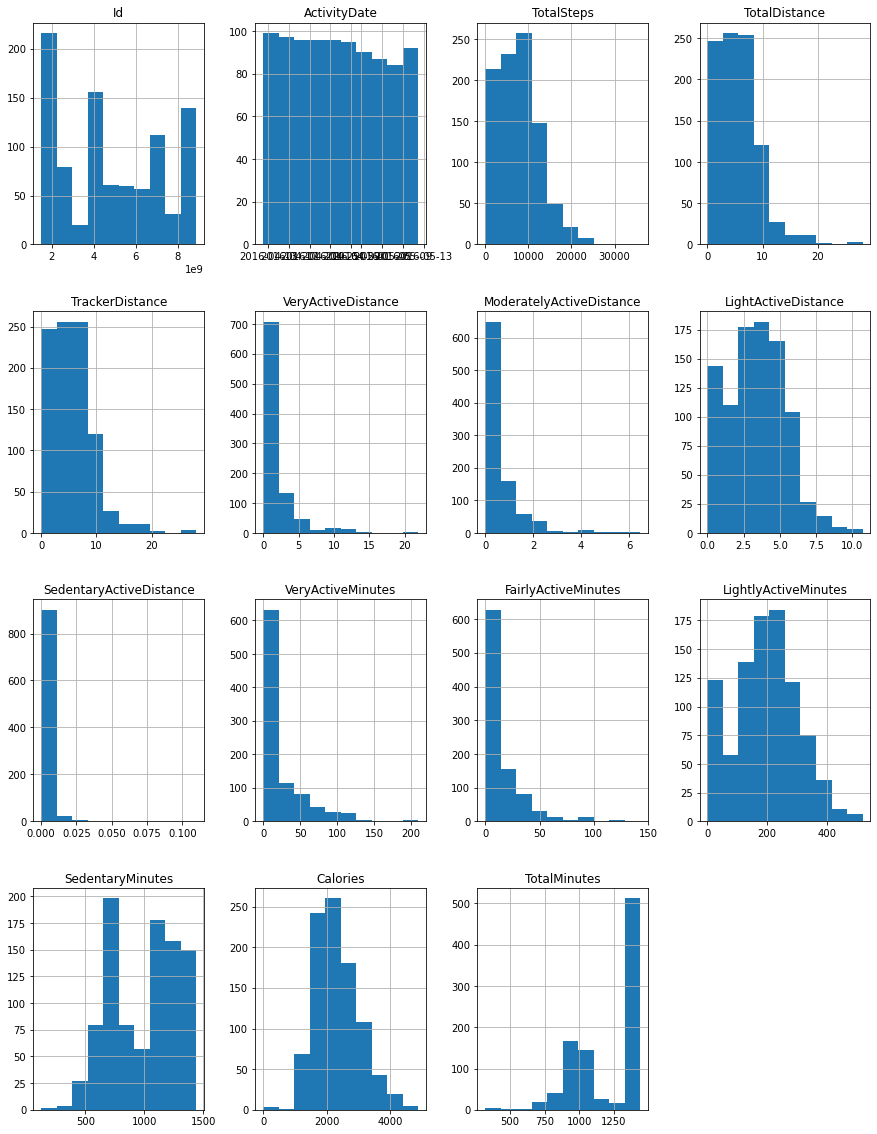

In [13]:
# visualize the entire dataset with histogram

fig = plt.figure(figsize=(15,20))
ax = fig.gca()
df.hist(ax =ax)

## Question 2 :  What is the weekly average of total steps and distance for gear users? 

In [16]:
# find weekly aveage of total steps and distance for all users 
weekly_avg_stepndistance = df.groupby([pd.Grouper(key= 'ActivityDate', freq= '1W')])['TotalSteps','TotalDistance'].mean().reset_index()
weekly_avg_stepndistance[['TotalSteps','TotalDistance']].mean()



C:\Users\tony3\AppData\Local\Temp/ipykernel_18128/2311295045.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  weekly_avg_stepndistance = df.groupby([pd.Grouper(key= 'ActivityDate', freq= '1W')])['TotalSteps','TotalDistance'].mean().reset_index()


TotalSteps       7644.245674
TotalDistance       5.494828
dtype: float64

C:\Users\tony3\AppData\Local\Temp/ipykernel_18128/1122266717.py:20: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


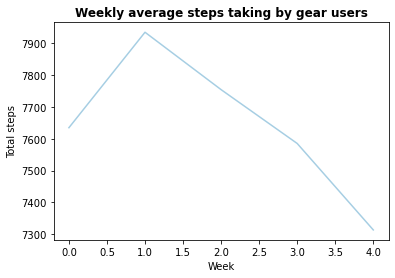

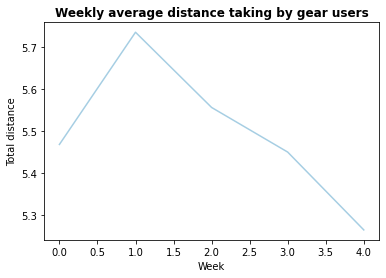

In [29]:
# visualize total steps 
avg_total_steps= weekly_avg_stepndistance['TotalSteps']
sns.set_palette('Paired')
fig, ax = plt.subplots()
sns.lineplot(data= avg_total_steps)
ax.set_title('Weekly average steps taking by gear users', fontweight ='bold')
ax.set_xlabel('Week')
ax.set_ylabel('Total steps')



# visualize total distance
avg_total_distance= weekly_avg_stepndistance['TotalDistance']
sns.set_palette('Paired')
fig, ax = plt.subplots()
sns.lineplot(data= avg_total_distance)
ax.set_title('Weekly average distance taking by gear users', fontweight ='bold')
ax.set_xlabel('Week')
ax.set_ylabel('Total distance')
fig.show()



## Question 3 : What are the proportion of different excercising time that users take? 

In [16]:
# to find the sum of VeryActiveMinutes, FairlyActiveMinutes, LightlyActiveMinutes, SedentaryMinutes for every user
very_active_min = df['VeryActiveMinutes'].sum()
fairly_active_min = df['FairlyActiveMinutes'].sum()
lightly_active_min = df['LightlyActiveMinutes'].sum()
sedentary_min = df['SedentaryMinutes'].sum()
total_mins = df['TotalMinutes'].sum()

# to find each proportion 
very_active_prop = very_active_min / total_mins
print("proportion of very active activity :\n" , very_active_prop)

fairly_active_prop = fairly_active_min / total_mins
print("proportion of fairly active activity :\n" , fairly_active_prop)

lightly_active_prop = lightly_active_min / total_mins
print("proportion of lightly active activity :\n" , lightly_active_prop)

sedentary_prop = sedentary_min / total_mins
print("proportion of sedentary activity :\n" , sedentary_prop)

proportion of very active activity :
 0.01737110366747568
proportion of fairly active activity :
 0.011127885500811636
proportion of lightly active activity :
 0.15814055890169684
proportion of sedentary activity :
 0.8133604519300158


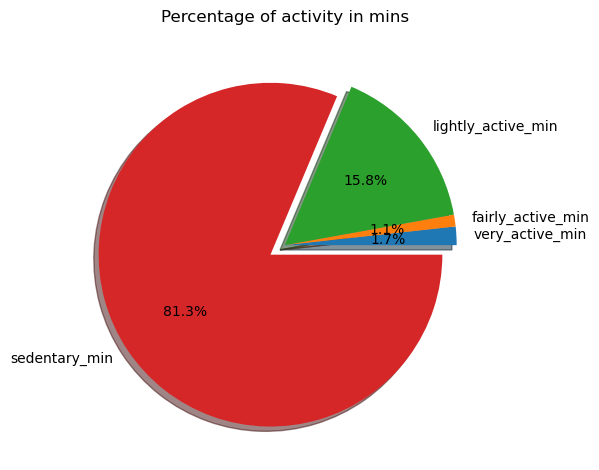

In [82]:
# visualize the proportions with pie chart 

slices = [very_active_prop, fairly_active_prop, lightly_active_prop, sedentary_prop]
labels = ['very_active_min', 'fairly_active_min', 'lightly_active_min', 'sedentary_min']
explode = [0,0,0,0.1]
plt.style.use('default')
plt.pie(slices, labels=labels, explode= explode, autopct= '%1.1f%%', shadow=True)
plt.title('Percentage of activity in mins')
plt.tight_layout()
plt.show()


## Question 4 : Is there a correlation between calories burned and total activity minutes with our users?  

C:\Users\tony3\AppData\Local\Temp/ipykernel_9860/2716558645.py:10: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig2.show()


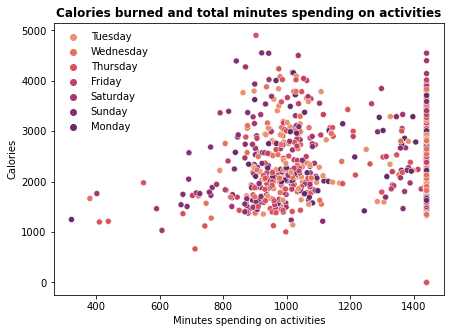

In [72]:
# visualize data 

fig2, ax2 = plt.subplots()
fig2.set_size_inches(7, 5)
sns.scatterplot(y= 'Calories', x= 'TotalMinutes', data= df, hue= 'DayOfWeek', palette='flare')
ax2.set_title('Calories burned and total minutes spending on activities',fontweight= 'bold')
ax2.set_ylabel('Calories')
ax2.set_xlabel('Minutes spending on activities')
ax2.legend(frameon= False)
fig2.show()

In [73]:
# find correlation between calories consumption and total minutes spending on activities

cor = df['Calories'].corr(df['TotalMinutes'])
print(' correlation between calories burned and total minutes spending on activities :', round(cor,3))

 correlation between calories burned and total minutes spending on activities : 0.004


## Question 5 : What is the weekly number of times users logging in?  

In [27]:
# count day of week for logging in times

weekly_login = df.DayOfWeek.value_counts()
weekly_login

Tuesday      151
Wednesday    149
Thursday     143
Friday       125
Saturday     123
Sunday       121
Monday       120
Name: DayOfWeek, dtype: int64

No handles with labels found to put in legend.
C:\Users\tony3\AppData\Local\Temp/ipykernel_9860/2795225217.py:10: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig3.show()


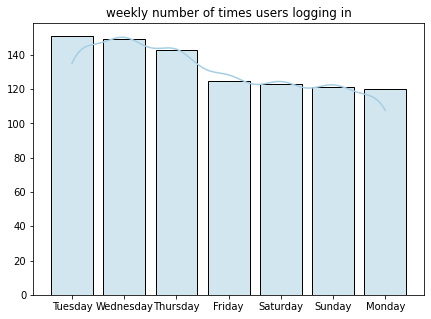

In [70]:
# visualize data 

fig3, ax3 = plt.subplots()
fig3.set_size_inches(7, 5)
sns.histplot(x= 'DayOfWeek' , data= df, bins=7, shrink=0.8 , kde=True)
ax3.set_title('weekly number of times users logging in')
ax3.set_xlabel('')
ax3.set_ylabel('')
ax3.legend(frameon= False)
fig3.show()


# Conclusion

According to our findings from above 5 questions we had analyze, we display the result as follows,

Question 1 : What is the average of total steps and distance for gear users?
<br>The average of tatal steps and distance are roughly 7693 steps and 5.5km, respectively.	

Question 2 : What is the weekly average of total steps and distance for gear users?
<br>The weekly average of total steps and distance are 7644 steps and 5.49km, respectively.

Question 3 : What are the proportion of different excercising time that users take?
<br>very active activity 1.7%, fairly active activity 1.1%, lightly active activity 15.8%, and sedentary activity 81.3%.  

Question 4 : Is there a correlation between calories burned and total activity minutes with our users?
<br>The coefficient correlation is 0.004, very weak or no association between calories burned and total activity minutes.  

Question 5 : What is the weekly number of times users logging in?
<br>Monday 120, Tuesday 151, Wendnesday 149, Thursday 143, Friday 125, Saturday 123, Sunday 121 (times)



# Interpreting findings 

Question 1 & Question 2 : 
<br>The CDC recommend that most adults aim for 10,000 steps per day . For most people, this is the equivalent of about 8 kilometers, or 5 miles. Most people in the United States only take 3,000–4,000 steps per day. Our findings indicate that in terms of excercising the users are above the range of average people but not reach the CDC critiera for adults. The average steps and distance reach the peak on 4/19, after that the both figures gradually decreasing and reach the bottom on 5/12, the reason behind might be due to national holiday. However, it needs to do some further research to confirm.   

Question 3 :
<br>The CDC recommend that most adults should do vigorous-intensity aerobic activity, moderate-intensity aerobic activity, and muscle-strengthening activities every week. According to the findings, for our users very active, fairly active, and lightly active activities only dominate for 18.7%; on the other hand, the sedentary activity takes 81.3%. This might indicate most of the users using our products not on the purpose of excercising, they are more frequent using them on inactive condition such as commuting, studying, driving...etc. 

Question 4 : 
<br>The number of calories burned in a one-hour weight training ranges from 180 to 266 calories in a one-hour session. If you increase your workout intensity to a vigorous training level, your calorie burn jumps to between 360 and 532 calories per hour. Therefore, this findings further indicate that most of our users not using our products on the purpose of excercising, they tend to use more frequent on inactive condition. 

Question 5 : 
<br>Our findings indicate that more users logging in our app on Tuesday, Wendesday, and Thursday, and gradually decreasing from Friday to Monday. This could be due to the workday routine for users, they might be officeworkers, students, people with fixed routine and have clear distinction between weekday and weekend. However, it needs to do some further background research to confirm.   


## Recommendations 

_1. Bellabeat marketing team can educating their users with more comprehensive excercising knowledge by providing excercising demo video on their app or social media. In addition, to categorize each excercising with different level of intensity to let users have better understanding on how to achieving their individual goals.  


_2. To send notification by the gears for users and inform them the sports' types which fit into the particular period of time and label them with different visual designs.  


_3. To send notification via the gears for users and inform them they are under the sedentary mode for too long. In addition, posting the risk of being under the sedentary mode on social media and other company broadcasting channel. 


_4. Bellabeat app can prompt notification to encourage users to excercise on weekends and holidays. 


_5. Bellabeat team can think the possibility of building other sedentary functions on gears since most of our users tend to use gears in sedentary mode. For instance, offering more options on gear design, build-in health monitoring function.  